<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

Using TensorFlow backend.


In [18]:
def plotArrays(A, B, n, xlabel, ylabel, title):
    plt.figure(1, figsize=(10, 6))
    plt.plot(range(n),A)
    plt.plot(range(n),B)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid(True)
    plt.legend(['Training', 'Validation'])
    plt.show()

<a id="tercero"></a>
## 3. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />


En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de características extraídas. Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip
```

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:
```python
import scipy.io as sio
sio.loadmat("file.mat")
```

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:
```
wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt
```

### a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [2]:
import scipy.io as sio
mat_train = sio.loadmat("./eventrain.mat")
mat_test = sio.loadmat("./eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]
row=len(data_train)
columns=len(data_train[0])
row2=len(data_test)
columns2=len(data_test[0])
print("La cantidad de datos en el conjunto de entrenamiento es ",(columns*row))
print("La cantidad de datos en el conjunto de test es ",(columns2*row2))

La cantidad de datos en el conjunto de entrenamiento es  38500
La cantidad de datos en el conjunto de test es  11550


### b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilizados.

Para el problema de clasificación se utilizo la representación de faceGist, donde se tienen 37 caracteristicas de entrada que representan la proyección de una cara en un espacio de fisherFace, el cual es efectivo para medidas de similaridad en rostros.

In [12]:
genFeat_train = data_train[0]
genFeat_test = data_test[0]
ageClass_train = data_train[1]
ageClass_test = data_test[1]
faceGist_train = data_train[4]
faceGist_test = data_test[4]
ffcoefs_train = data_train[3]
ffcoefs_test = data_test[3]

#x_train = pd.DataFrame(genFeat_train, columns=["xcenter", "ycenter", "minSpanningTreeDegree", "SizeRelativeToNeighbor", "PosX", "PosY", "neiAngle", "myAngle","SizeRelAverage", "x of [x y] position relative average.", "y of [x y] position relative average.", "Size Relative to Planar FaceFit.", "Nearest Neighbor Gender   (NOT USED IN CVPR 09)","NEarest Neighbor Agebin   (NOT USED IN CVPR 09)"])
#x_test = pd.DataFrame(genFeat_test, columns=["xcenter", "ycenter", "minSpanningTreeDegree", "SizeRelativeToNeighbor", "PosX", "PosY", "neiAngle", "myAngle","SizeRelAverage", "x of [x y] position relative average.", "y of [x y] position relative average.", "Size Relative to Planar FaceFit.", "Nearest Neighbor Gender   (NOT USED IN CVPR 09)","NEarest Neighbor Agebin   (NOT USED IN CVPR 09)"])

x_train = pd.DataFrame(faceGist_train, dtype = np.float64)
x_test = pd.DataFrame(faceGist_test, dtype = np.float64)
y_train = ageClass_train
y_test = ageClass_test
print(x_test)

             0           1           2           3           4           5    \
0      16.453856   34.839340   48.703499   34.137562   14.109256   -8.558578   
1      53.821861   93.610512   65.627831   18.610142   15.495882  -29.615044   
2       6.814312  -20.586594  -50.358768  -68.416695  -80.314156  -44.176937   
3     -41.623909  -55.691147  -36.938717   -0.583425   33.026913   50.243717   
4     -22.947725  -50.262939  -58.307285  -36.052349  -20.516966    8.044983   
5     -10.556078  -72.033813 -122.289497 -134.627106 -132.193314  -58.059704   
6      20.051249   54.814274   72.614754   55.763729   23.104187   -7.896599   
7       3.736890  -35.876785  -56.466827  -33.955353  -41.938866  -31.261332   
8      17.311832   -5.061167  -37.881474  -59.164452  -89.675797  -55.001472   
9      -9.362698  -51.620041  -77.747414  -68.129555  -67.631416  -33.991528   
10     12.579058   18.136227   16.402540    0.731878  -15.648630  -13.272566   
11    -58.171158  -93.829140  -57.198513

### c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.


### Problema como tarea de clasificación

In [62]:
y_train_class = np.copy(y_train)
y_test_class = np.copy(y_test)
#Traducción a clases
classes = np.array([1, 5, 10, 16, 28, 51, 75])
for i in range(7):
    y_train_class[y_train_class == classes[i]] = i
    y_test_class[y_test_class == classes[i]] = i

y_train_onehot = keras.utils.to_categorical(y_train_class,num_classes=7)
y_test_onehot = keras.utils.to_categorical(y_test_class,num_classes=7)

ffw_network = keras.models.Sequential()
ffw_network.add(Dense(units = 50, kernel_initializer='glorot_uniform', input_dim = x_train.shape[1] ,activation = "relu"))
ffw_network.add(Dense(units = 10,kernel_initializer='glorot_uniform', activation = "relu"))
ffw_network.add(Dense(units = 7, kernel_initializer='glorot_uniform', activation = "softmax"))

ffw_network.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics = [keras.metrics.categorical_accuracy])

history = ffw_network.fit(x_train.values, y_train_onehot, epochs = 64, batch_size=32, verbose =1, validation_data=(x_test.values, y_test_onehot))

Train on 3500 samples, validate on 1050 samples
Epoch 1/64
3500/3500 [==============================] - 0s - loss: 13.6031 - categorical_accuracy: 0.1483 - val_loss: 13.7496 - val_categorical_accuracy: 0.1429
Epoch 2/64
3500/3500 [==============================] - 0s - loss: 13.5316 - categorical_accuracy: 0.1549 - val_loss: 13.3527 - val_categorical_accuracy: 0.1657
Epoch 3/64
3500/3500 [==============================] - 0s - loss: 13.3692 - categorical_accuracy: 0.1640 - val_loss: 13.3678 - val_categorical_accuracy: 0.1657
Epoch 4/64
3500/3500 [==============================] - 0s - loss: 13.3488 - categorical_accuracy: 0.1657 - val_loss: 13.2733 - val_categorical_accuracy: 0.1676
Epoch 5/64
3500/3500 [==============================] - 0s - loss: 13.0580 - categorical_accuracy: 0.1837 - val_loss: 13.2814 - val_categorical_accuracy: 0.1676
Epoch 6/64
3500/3500 [==============================] - 0s - loss: 12.5499 - categorical_accuracy: 0.1920 - val_loss: 11.6431 - val_categorical_acc

In [63]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
print(ffw_network.evaluate(x_test.values, y_test_onehot))
y_aprox_class = ffw_network.predict_classes(x_test.values)

y_aprox = np.copy(y_aprox_class)
for i in range(7):
    y_aprox[y_aprox == i] = classes[i]

print("\nEl error cuadratico medio es:",mse(y_aprox, y_test))

 928/1050 [=========================>....] - ETA: 0s
El error cuadratico medio es: 759.0809523809523


In [64]:
result = pd.DataFrame(history.history)
result.to_csv("history3c-class.csv")

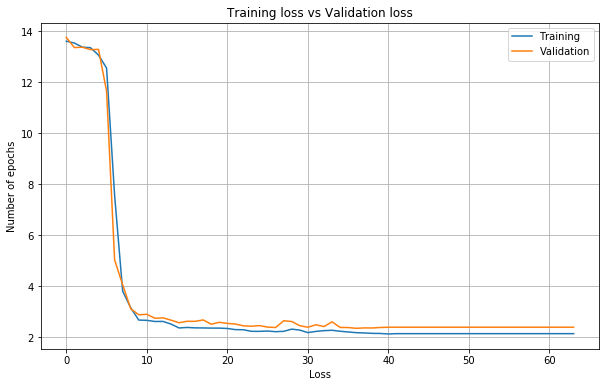

In [65]:
history3c = pd.read_csv("history3c-class.csv")
train_loss = history3c['loss']
val_loss = history3c['val_loss']
plotArrays(train_loss, val_loss, 64, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

### Problema como tarea de Regresión

In [16]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


ffw2 = keras.models.Sequential()
ffw2.add(Dense(256, kernel_initializer='uniform',input_dim=x_train_scaled.shape[1], activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(256, kernel_initializer='uniform',activation='relu'))
ffw2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
ffw2.compile(loss='mean_squared_error', optimizer = "rmsprop", metrics = ["accuracy"])
history = ffw2.fit(x_train_scaled.values, y_train, epochs = 32, verbose =1, batch_size = 32, validation_data = (x_test_scaled.values, y_test))

Train on 3500 samples, validate on 1050 samples
Epoch 1/32
3500/3500 [==============================] - 1s - loss: 666.9077 - acc: 0.0231 - val_loss: 555.6773 - val_acc: 0.0181
Epoch 2/32
3500/3500 [==============================] - 0s - loss: 507.5035 - acc: 0.0329 - val_loss: 642.8779 - val_acc: 0.0352
Epoch 3/32
3500/3500 [==============================] - 0s - loss: 449.4620 - acc: 0.0263 - val_loss: 461.4545 - val_acc: 0.0200
Epoch 4/32
3500/3500 [==============================] - 0s - loss: 395.6616 - acc: 0.0240 - val_loss: 468.5125 - val_acc: 0.0210
Epoch 5/32
3500/3500 [==============================] - 0s - loss: 358.3781 - acc: 0.0317 - val_loss: 450.5304 - val_acc: 0.0219
Epoch 6/32
3500/3500 [==============================] - 0s - loss: 322.2851 - acc: 0.0334 - val_loss: 520.2947 - val_acc: 0.0410
Epoch 7/32
3500/3500 [==============================] - 0s - loss: 288.8994 - acc: 0.0451 - val_loss: 525.4439 - val_acc: 0.0229
Epoch 8/32
3500/3500 [===========================

In [17]:
ffw2.evaluate(x_test_scaled.values, y_test)

  32/1050 [..............................] - ETA: 0s

[448.1327540370396, 0.08380952483131772]

In [19]:
result = pd.DataFrame(history.history)
result.to_csv("history3c.csv")

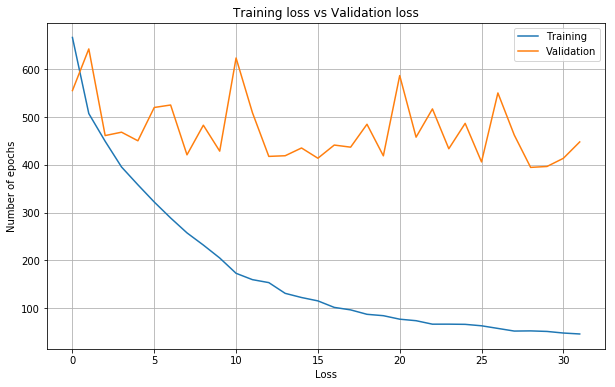

In [21]:
history3c = pd.read_csv("history3c.csv")
train_loss = history3c['loss']
val_loss = history3c['val_loss']
plotArrays(train_loss, val_loss, 32, 'Loss', 'Number of epochs', 'Training loss vs Validation loss')

> Podemos notar que alcanzamos un mse menor al usar regresión lineal, pero esta aunque mejorará sus resultados en training, su error sobre test se mantiene mas o menos constante. En cambio, si bien al usar classification obtuvimos un error mayor, este concuerda con la curva del error del entrenamiento.